Autor: Natalia Kiełbasa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Mini-projekt (DP): „Co zmienia optymalną politykę i wartość startu?”

### Kontekst
W rozdziale 4 zrobiliśmy Dynamic Programming dla tablicowych MDP:
- mamy **model** środowiska w postaci `P[s][a] = [(p, s2, r, terminated), ...]`,
- umiemy liczyć:
  - `v_π` (policy evaluation),
  - poprawiać politykę (policy improvement),
  - znajdować optimum: `π*`, `v*` (policy iteration / value iteration).

W tym mini-projekcie wykonasz **krótkie badanie**: jak zmiana parametrów środowiska lub zadania wpływa na:
- `v*(start)` — wartość stanu startowego,
- oraz (opcjonalnie) kształt polityki `π*` (strzałki).

---

## Co to jest `v(start)` w skrócie (potem rozwinięte, jeśli ktoś potrzebuje)?
`v(start)` to wartość funkcji wartości w stanie startowym:

$
v(start) = V_\pi(s_{\text{start}})
$

czyli oczekiwana (zdyskontowana) suma nagród, gdy startujesz w `start` i działasz według polityki `π`.
W praktyce to jedna liczba odpowiadająca na pytanie:

> **„Jak dobry jest ten sposób działania, jeśli startuję z typowego stanu startowego?”**

## Co oznacza dokładnie `v(start)` i jak policzyć (powtórzenie powtórzenia :) )?

`v(start)` to **wartość stanu startowego** (czyli wartość funkcji wartości w stanie, od którego zwykle zaczynamy):

$
v(start) = V_\pi(s_{\text{start}})
$

### Definicja (intuicja)
Jeśli zaczynamy w stanie `start` i dalej postępujemy zgodnie z polityką \(\pi\),
to `v(start)` jest **oczekiwaną (zdyskontowaną) sumą przyszłych nagród**:

$
V_\pi(s_{\text{start}})=\mathbb{E}_\pi\left[\sum_{t=0}^{\infty}\gamma^t R_{t+1}\ \middle|\ S_0=s_{\text{start}}\right]
$

Czyli to jedna liczba, która odpowiada na pytanie:

> **„Jak dobry jest ten sposób działania (polityka), jeśli zaczynam od stanu startowego?”**

---

## Jak interpretować `v(start)` w naszych środowiskach?

### 1) FrozenLake (epizodyczne, nagroda na końcu)
W FrozenLake nagroda jest zwykle:
- `+1` za wejście na pole `G` (goal),
- `0` w pozostałych przypadkach,
- epizod kończy się na `H` (hole) lub `G`.

W takim układzie `v(start)` można interpretować jako:

> **zdyskontowaną “szansę sukcesu”** (dotarcia do celu), uwzględniając ryzyko i γ.

- `slippery=True` obniża `v(start)`, bo ruch jest mniej kontrolowalny → częściej kończysz w dziurze.
- większe `γ` sprawia, że bardziej „opłaca się” dążyć do odległego celu (mniej karzesz opóźnienie).

---

## Dlaczego `v(start)` jest przydatne?

To **jedna liczba** (prosty wskaźnik), dzięki której można:
- porównywać różne polityki (losowa vs optymalna),
- porównywać różne ustawienia środowiska (np. `slippery`),
- porównywać różne parametry (`γ`, kary, nagrody teleportów),
- robić wykresy typu: *parametr → jakość zachowania*.

W praktyce to DP-odpowiednik „średniego returnu” znanego z RL,
tylko że tu liczymy go z modelu (bez próbkowania epizodów).

---

## Jak policzyć `v(start)` w notebooku?

Zakładamy, że masz:
- `v` jako wektor wartości stanów (np. wynik policy/value iteration albo policy evaluation),
- `start_state` (u nas zwykle `0`).

Wtedy (po dowolnej metodzie ___ iteration):

```python
v_start = float(v[start_state])
print("v(start) =", v_start)
```

## Przykład rozgrzewkowy (template): wpływ γ na `v*(start)` w FrozenLake

### W tym przykładzie **Krok 1 i Krok 2 są już wykonane**:
- środowisko jest wybrane (`P_fl_slip`),
- w każdej iteracji liczymy optimum (`π*`, `v*`) metodą `value_iteration`.

Poniższy kod jest **wzorcem**, który skopiujesz później dla Gridworld.
Przyjmujemy konwencję `start_state = 0` (lewy górny róg / pole `S`).


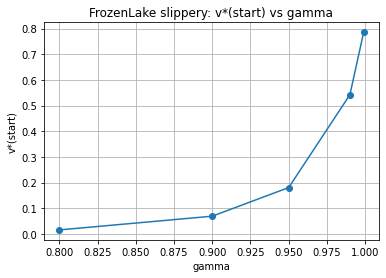

[(0.8, 0.015434338412935945), (0.9, 0.06889090447458562), (0.95, 0.18047157761948407), (0.99, 0.5420259308172148), (0.999, 0.7855332550140779)]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

gammas = [0.8, 0.9, 0.95, 0.99,0.999]
vstarts = []

start_state = 0
for g in gammas:
    pi_star, v_star = value_iteration(P_fl_slip, gamma=g, theta=1e-10)
    vstarts.append(float(v_star[start_state]))

plt.figure()
plt.plot(gammas, vstarts, marker='o')
plt.xlabel("gamma")
plt.ylabel("v*(start)")
plt.title("FrozenLake slippery: v*(start) vs gamma")
plt.grid(True)
plt.show()

print(list(zip(gammas, vstarts)))


## Przykładowa ścieżka rozwiązania pytania badawczego A (porównawcze): Jak `γ` działa w zadaniu epizodycznym vs continuing?
W ramach projektu można po prostu ją przeprowadzić wg opisu (prawie gotowe :) )
tylko trzeba przeprowadzić te eksperymety, zrozumieć i opisać swoimi słowami.

### Cel
Porównaj wpływ parametru dyskontowania `γ` na `v*(start)` w dwóch różnych typach zadań:

- **FrozenLake** (epizodyczne): nagroda jest na końcu epizodu (dotarcie do `G`)
- **Gridworld** (continuing): proces trwa bez końca (zbieramy nagrody w nieskończonym horyzoncie)

### Dlaczego to jest ciekawe?
`γ` kontroluje, jak mocno cenisz przyszłość.  
W epizodycznym zadaniu jego wpływ wygląda inaczej niż w continuing, bo:
- w FrozenLake nagroda zwykle pojawia się po kilku krokach (krótka trajektoria),
- w Gridworld liczy się „długoterminowe zachowanie” w nieskończonym horyzoncie.

### Co mierzymy
Dla każdej wartości `γ` liczymy:
- `v*(start)` w FrozenLake (det lub slippery),
- `v*(start)` w Gridworld.

Następnie robimy wykres:
- oś X: `γ`,
- oś Y: `v*(start)`.

### Zakres γ (proponowany)
Użyj np. listy:
`gammas = [0.8, 0.9, 0.95, 0.99]`

> Uwaga: w continuing zadaniach DP zakładamy `γ < 1`, bo wtedy operator Bellmana jest kontrakcją
> i wartości są dobrze określone.

---

## Przykład (wzór implementacyjny) — wykonany dla FrozenLake

Poniższa komórka pokazuje, jak zrobić sweep po `γ` dla jednego środowiska.  
W kolejnym kroku zastosujesz ten sam wzór dla Gridworld.


In [ ]:
import matplotlib.pyplot as plt

gammas = [0.8, 0.9, 0.95, 0.99]
start_state = 0

vstarts_fl = []
for g in gammas:
    pi_star, v_star = value_iteration(P_fl_det, gamma=g, theta=1e-10)
    vstarts_fl.append(float(v_star[start_state]))

plt.figure()
plt.plot(gammas, vstarts_fl, marker='o')
plt.xlabel("gamma")
plt.ylabel("v*(start)")
plt.title("FrozenLake (det): v*(start) vs gamma")
plt.grid(True)
plt.show()

print(list(zip(gammas, vstarts_fl)))


NameError: name 'value_iteration' is not defined

## Twoje zadanie: zrób to samo dla Gridworld i porównaj

1) Powtórz sweep po `γ` dla **Gridworld** (ten sam `gammas`, ten sam `start_state=0`).
2) Zrób jeden wspólny wykres z dwiema krzywymi:
   - FrozenLake (det lub slippery),
   - Gridworld.

### Kod (szablon — uzupełnij tylko brakujące fragmenty)


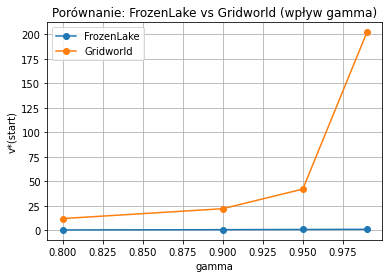

FrozenLake: [(0.8, 0.32768000000000014), (0.9, 0.5904900000000002), (0.95, 0.7737809374999999), (0.99, 0.9509900498999999)]
Gridworld: [(0.8, 11.899095668729178), (0.9, 21.977485287159247), (0.95, 41.99469264413066), (0.99, 201.99979758611693)]


In [ ]:
vstarts_gw = []
for g in gammas:
    # TODO: policz v* w Gridworld (value_iteration albo policy_iteration)
    # Wykonaj algorytm i wstaw do vstarts_gw - można skorzystać z wcześniejszych implementacji/wywołań - wyżej jest przykład
    vstarts_gw.append(float(v_star[start_state]))

plt.figure()
plt.plot(gammas, vstarts_fl, marker='o', label="FrozenLake")
plt.plot(gammas, vstarts_gw, marker='o', label="Gridworld")
plt.xlabel("gamma")
plt.ylabel("v*(start)")
plt.title("Porównanie: FrozenLake vs Gridworld (wpływ gamma)")
plt.grid(True)
plt.legend()
plt.show()

print("FrozenLake:", list(zip(gammas, vstarts_fl)))
print("Gridworld:", list(zip(gammas, vstarts_gw)))


## Pytania do analizy (napisz 4–8 zdań)

1) Jak zmienia się `v*(start)` wraz z `γ` w FrozenLake?  
   (Podpowiedź: w det często widać zależność ~ `γ^L`, gdzie L to długość najlepszej ścieżki.)

2) Jak wygląda wpływ `γ` w Gridworld? Czy jest „silniejszy” / „słabszy” niż w FrozenLake?

3) Dlaczego te dwa światy zachowują się inaczej?  
   Użyj pojęć: epizodyczne vs continuing, horyzont czasowy, nagroda na końcu vs nagrody w nieskończonym czasie.

4) Czy przy bardzo dużym `γ` wartości w Gridworld robią się bardzo duże?  
   Jeśli tak, co to mówi o naturze continuing zadań i roli dyskontowania?


## Zadanie (obowiązkowe)
Twoim celem jest wykonać **eksperyment + analizę** (badanie). Zrób to w krokach:

### Krok 1 — wybierz środowisko
Wybierz jedno (albo zrób oba jako bonus):
- FrozenLake (`P_fl_det` lub `P_fl_slip`) — epizodyczne (Start - Goal, pamiętacie?:) ),
- Gridworld (`P_gw` lub większy Gridworld, jeśli jest w notebooku) — continuing (jak wyżej :) ).

Ustal `start_state` (zwykle `0`).
 v(start) to jedna liczba, która pozwala porównywać eksperymenty.
Musisz więc wskazać z jakiego stanu startujesz.

### Krok 2 — policz optimum (punkt odniesienia)
Policz `π*` i `v*` metodą DP:
- `value_iteration(...)` lub `policy_iteration(...)`.

Zapisz `v*(start)`.

### Krok 3 — wybierz 2 pytania badawcze i wykonaj eksperymenty
Wybierz **dwa** pytania z listy poniżej i wykonaj pomiary (sweep parametrów).

### Krok 4 — zrób wykresy
Dla każdego pytania przygotuj co najmniej **1 wykres**.
Minimalnie: wykres parametru (X) → `v*(start)` (Y).

### Krok 5 — opisz wnioski (krótko, ale konkretnie)
Napisz 4–8 zdań:
- co zmieniałeś,
- co zmierzyłeś,
- co wyszło i dlaczego (intuicja + odniesienie do definicji Bellmana).

---

## Pytania badawcze (wybierz 2)

### Pytanie A — wpływ `γ` (gamma)
**Hipoteza do sprawdzenia:** większe `γ` zwiększa znaczenie przyszłości i zmienia `v*(start)` oraz czasem politykę.

Zrób sweep po `γ`, np. `[0.8, 0.9, 0.95, 0.99]`.
Dla każdego `γ` policz `v*(start)`.

**Wykres:** `γ` vs `v*(start)`.

---

### Pytanie B — deterministyczne vs slippery (FrozenLake)
**Hipoteza do sprawdzenia:** stochastyczność (`slippery=True`) obniża `v*(start)` i może zmienić `π*`.

Porównaj:
- `P_fl_det` vs `P_fl_slip` (dla tego samego `γ`).

**Wykres:** dwa punkty/kolumny (det vs slippery) dla `v*(start)` (albo dwa przebiegi vs γ).

---

### Pytanie C — wpływ kar/nagród w Gridworld
**Hipoteza do sprawdzenia:** większe kary za ścianę lub mniejsze nagrody teleportów zmieniają `v*` i „kierunek” polityki.

Zrób sweep po jednym parametrze środowiska (jeśli masz builder świata):
- `wall_penalty ∈ {-1, -2, -5}`,
- lub nagrody teleportów (np. zmniejsz/zwieksz).

**Wykres:** parametr vs `v*(start)`.

---

### Pytanie D — PI vs VI jako metody numeryczne
**Hipoteza do sprawdzenia:** PI ma mniej iteracji „zewnętrznych”, a VI robi więcej prostych backupów.

Zmierz czas działania (np. `time.time()`) dla PI i VI na tym samym środowisku.

**Wykres:** słupki czasu (PI vs VI) lub liczba iteracji (jeśli zapisujesz liczbę iteracji).

> Uwaga: polityki mogą się różnić w stanach z remisami, ale `v*` powinno być takie samo (w granicach numeryki).

---

## Krok 1 - wybór środowiska - FrozenLake

In [2]:
# Dodanie potrzebnych metod

def pretty_matrix_as_grid(v: np.ndarray, nrow: int, ncol: int, decimals: int = 1):
    """Wyświetla wektor wartości jako siatkę nrow x ncol."""
    grid = np.asarray(v, dtype=float).reshape(nrow, ncol)
    with np.printoptions(precision=decimals, suppress=True):
        print(grid)

def action_arrows(pi_det: np.ndarray, nrow: int, ncol: int, arrows):
    """Wyświetla deterministyczną politykę jako strzałki w siatce."""
    out = []
    for r in range(nrow):
        row = []
        for c in range(ncol):
            s = r * ncol + c
            a = int(pi_det[s])
            row.append(arrows.get(a, '?'))
        out.append(' '.join(row))
    print('\n'.join(out))


def build_P_r_for_policy(P, pi: np.ndarray):
    """Buduje (P_pi, r_pi) dla danej polityki pi na podstawie modelu P[s][a].

    Zwraca:
    - P_pi: macierz przejść (nS x nS)
    - r_pi: wektor nagród oczekiwanych (nS,)

    Uwaga: dla zadań epizodycznych (FrozenLake) działa poprawnie, o ile stany terminalne są absorbujące
    z nagrodą 0 (tak jest w standardowym FrozenLake).
    """
    nS, nA = pi.shape
    P_pi = np.zeros((nS, nS), dtype=float)
    r_pi = np.zeros(nS, dtype=float)

    for s in range(nS):
        for a in range(nA):
            w = float(pi[s, a])
            if w == 0.0:
                continue
            for (p, s2, r, terminated) in P[s][a]:
                P_pi[s, int(s2)] += w * float(p)
                r_pi[s] += w * float(p) * float(r)
    return P_pi, r_pi


def evaluate_policy_linear_system(P_pi: np.ndarray, r_pi: np.ndarray, gamma: float) -> np.ndarray:
    """Dokładna ewaluacja polityki przez układ liniowy: (I - gamma P_pi) v = r_pi."""
    nS = P_pi.shape[0]
    I = np.eye(nS)
    return np.linalg.solve(I - gamma * P_pi, r_pi)


def build_frozenlake_P(desc, is_slippery: bool = False):
    """
    Buduje model FrozenLake w formacie P[s][a] bez użycia Gym.

    desc: lista stringów opisujących mapę, np.
          ["SFFF",
           "FHFH",
           "FFFH",
           "HFFG"]

    Konwencja akcji (jak w Gym):
      0 = LEFT, 1 = DOWN, 2 = RIGHT, 3 = UP

    Nagroda:
      +1 za wejście na G, w pozostałych przypadkach 0.

    Stany terminalne:
      H (hole) i G (goal).
    """

    # Zamieniamy opis mapy na tablicę znaków
    desc = np.asarray([list(row) for row in desc], dtype='<U1')
    nrow, ncol = desc.shape
    nS, nA = nrow * ncol, 4   # liczba stanów i akcji

    # Indeksy akcji (zgodne z Gym)
    LEFT, DOWN, RIGHT, UP = 0, 1, 2, 3

    # Wektory ruchu dla każdej akcji
    moves = {
        LEFT:  (0, -1),
        DOWN:  (1,  0),
        RIGHT: (0,  1),
        UP:    (-1, 0),
    }

    # Zamiana (r, c) -> indeks stanu
    def to_s(r, c):
        return r * ncol + c

    # Jeden krok z pozycji (r, c) dla akcji a
    def step_from(r, c, a):
        dr, dc = moves[a]
        r2, c2 = r + dr, c + dc

        # FrozenLake: wyjście poza planszę = zostajemy w miejscu
        if (r2 < 0) or (r2 >= nrow) or (c2 < 0) or (c2 >= ncol):
            r2, c2 = r, c

        return r2, c2

    # Inicjalizacja struktury P[s][a]
    P = {s: {a: [] for a in range(nA)} for s in range(nS)}

    # Iterujemy po wszystkich polach planszy
    for r in range(nrow):
        for c in range(ncol):
            s = to_s(r, c)
            tile = desc[r, c]

            # Stany terminalne (H i G):
            # są absorbujące — niezależnie od akcji zostajemy w tym samym stanie
            if tile in ('H', 'G'):
                for a in range(nA):
                    P[s][a] = [(1.0, s, 0.0, True)]
                continue

            # Stany nieterminalne
            for a in range(nA):
                outcomes = []

                # Wersja śliska: akcja nie realizuje się dokładnie
                if is_slippery:
                    # Faktyczna akcja to a-1, a, a+1 z prawd. 1/3
                    candidates = [(a - 1) % 4, a, (a + 1) % 4]
                    probs = [1/3, 1/3, 1/3]
                else:
                    # Wersja deterministyczna
                    candidates = [a]
                    probs = [1.0]

                # Dla każdej możliwej „rzeczywistej” akcji
                for a_real, p in zip(candidates, probs):
                    r2, c2 = step_from(r, c, a_real)
                    s2 = to_s(r2, c2)
                    tile2 = desc[r2, c2]

                    # Sprawdzamy, czy trafiliśmy w stan terminalny
                    terminated = tile2 in ('H', 'G')

                    # Nagroda tylko za wejście na G
                    reward = 1.0 if tile2 == 'G' else 0.0

                    outcomes.append((float(p), int(s2), float(reward), bool(terminated)))

                # Scalanie identycznych następstw
                # (różne a_real mogą prowadzić do tego samego s2)
                merged = {}
                for p, s2, rwd, term in outcomes:
                    key = (s2, rwd, term)
                    merged[key] = merged.get(key, 0.0) + p

                # Finalna lista wyników dla (s, a)
                P[s][a] = [
                    (p, s2, rwd, term)
                    for (s2, rwd, term), p in merged.items()
                ]

    return P, nS, nA, nrow, ncol, desc

In [ ]:
# Ustalamy wstępne start_state
start_state = 0

## Krok 2 - policzenie optimum

In [ ]:
# Implementacja value iteration
def value_iteration(P, gamma: float = 0.9, theta: float = 1e-10, max_iters: int = 100_000):
    """Value Iteration: bezpośrednio przybliża v* przez backup optymalności (max).

    TODO (Ćwiczenie 4)
    Zaimplementuj value iteration:
        v(s) <- max_a E[ r + gamma * v(s') ]

    Wymagania:
    - iteruj aż max zmiana w iteracji < theta
    - obsłuż `terminated` (bootstrap = 0)
    - po zbieżności odczytaj politykę zachłanną względem v* (np. przez greedy_policy_from_v)
    - zwróć (pi_det, v)

    Wskazówka: to prawie to samo co policy evaluation, tylko zamiast średniej po akcjach masz `max`.
    """

    # TODO: wyznacz nS, nA; zainicjalizuj v
    # TODO: pętla aktualizacji wartości z max po akcjach
    # TODO: po zbieżności zbuduj pi_det
    # --- rozmiary z modelu ---
    
    raise NotImplementedError('TODO: zaimplementuj value_iteration')

In [ ]:
# Liczymy  `π*` i `v*` metodą DP i zapisujemy v*(start)--> upewnic się czy to ta metoda xd

gammas = [0.8, 0.9, 0.95, 0.99]
start_state = 0

vstarts_fl = []
for g in gammas:
    pi_star, v_star = value_iteration(P_fl_det, gamma=g, theta=1e-10)
    vstarts_fl.append(float(v_star[start_state]))

## Kroki 3 + 4 + 5 - wybór dwóch pytań badawczych, wykonanie eksperymentów, wykonanie wykresów i analiza całości

### Pytanie A — wpływ `γ` (gamma)
**Hipoteza do sprawdzenia:** większe `γ` zwiększa znaczenie przyszłości i zmienia `v*(start)` oraz czasem politykę.

Zrób sweep po `γ`, np. `[0.8, 0.9, 0.95, 0.99]`.
Dla każdego `γ` policz `v*(start)`.

**Wykres:** `γ` vs `v*(start)`.

### Pytanie B — deterministyczne vs slippery (FrozenLake)
**Hipoteza do sprawdzenia:** stochastyczność (`slippery=True`) obniża `v*(start)` i może zmienić `π*`.

Porównaj:
- `P_fl_det` vs `P_fl_slip` (dla tego samego `γ`).

**Wykres:** dwa punkty/kolumny (det vs slippery) dla `v*(start)` (albo dwa przebiegi vs γ).